In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('IMDB-Movie-Data.csv', index_col='Rank')

In [3]:
df.head(10)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0


In [4]:
df.tail(3)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [5]:
df.shape
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Number of rows : 1000
Number of columns : 11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


### Missing values

In [7]:
df.isna().sum(axis='rows')

Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [8]:
df.isna().sum(axis='columns')

Rank
1       0
2       0
3       0
4       0
5       0
       ..
996     1
997     0
998     0
999     1
1000    0
Length: 1000, dtype: int64

In [9]:
# number of missing values
df.isna().sum().sum() 

192

In [10]:
# boolean of missing values
df.isna().any().any() 

True

<AxesSubplot: ylabel='Rank'>

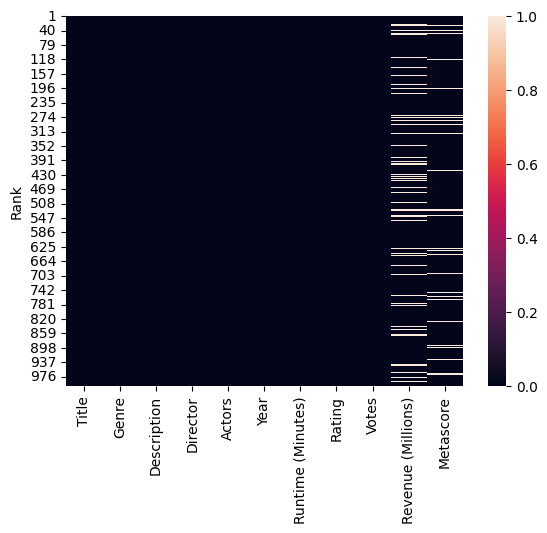

In [11]:
sns.heatmap(df.isna())

In [12]:
# Percentage of missing value
per_missing = df.isna().sum() * 100/len(df)
per_missing

Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [13]:
# Droping missing values
df_no_null  = df.dropna(axis=0, how='any', subset=['Revenue (Millions)', 'Metascore'])

In [14]:
df_no_null.isna().sum().any()

False

In [15]:
# looking for duplicate values
is_duplicate = df_no_null.duplicated().any()

In [16]:
is_duplicate

False

In [17]:
df_no_null.describe()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


### Outliers

In [18]:
# Select only the numerical columns from the dataset
numerical_data = df_no_null[['Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']]

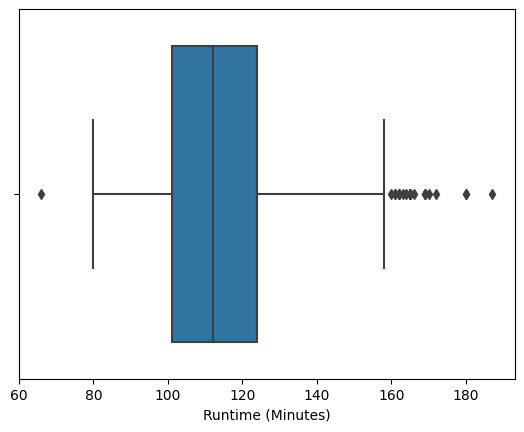

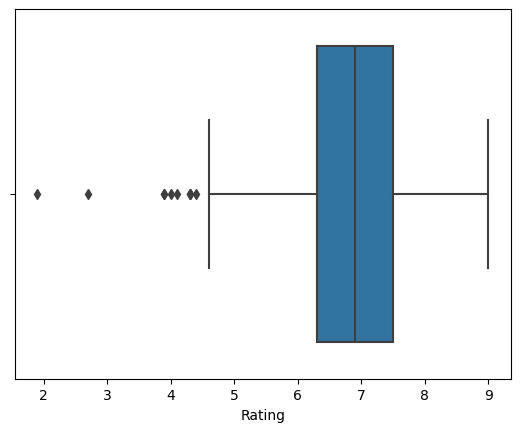

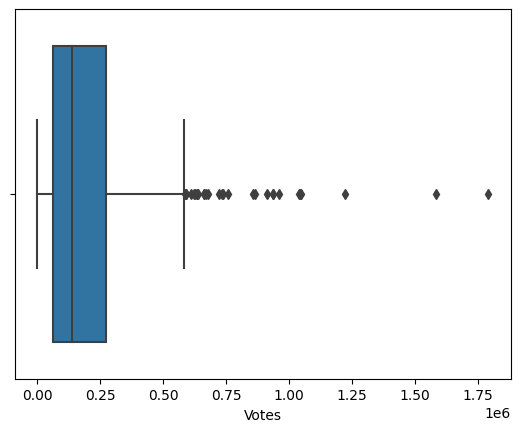

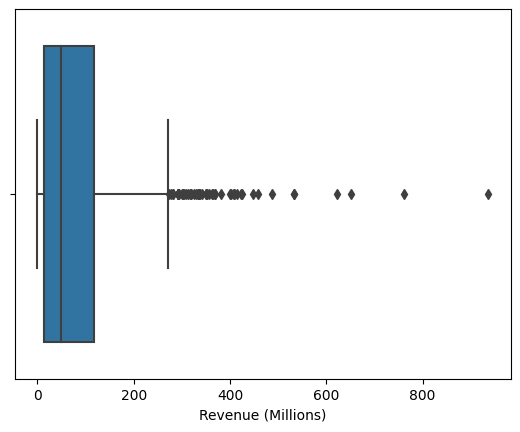

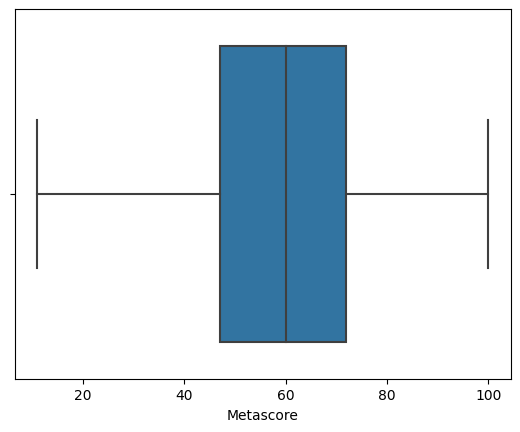

In [19]:
# Create the boxplot
for feature in numerical_data:
    sns.boxplot(x=feature, data = df_no_null)
    plt.show()

In [20]:
# Finding outliers using IQR
for col in numerical_data:
    Q1 = np.quantile(df_no_null[col], 0.25)
    Q3 = np.quantile(df_no_null[col], 0.75)

    # Calculate IQR
    IQR = Q3 - Q1
    # Set the lower and upper bounds using the IQR rule
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with lower bound
    df_no_null[col] = np.where(df_no_null[col] < lower_bound, lower_bound, df_no_null[col])

    # Replace outliers with upper bound
    df_no_null[col] = np.where(df_no_null[col] > upper_bound, upper_bound, df_no_null[col])

C:\Users\aswan\AppData\Local\Temp\ipykernel_14324\1131098645.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_null[col] = np.where(df_no_null[col] < lower_bound, lower_bound, df_no_null[col])
C:\Users\aswan\AppData\Local\Temp\ipykernel_14324\1131098645.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_null[col] = np.where(df_no_null[col] > upper_bound, upper_bound, df_no_null[col])


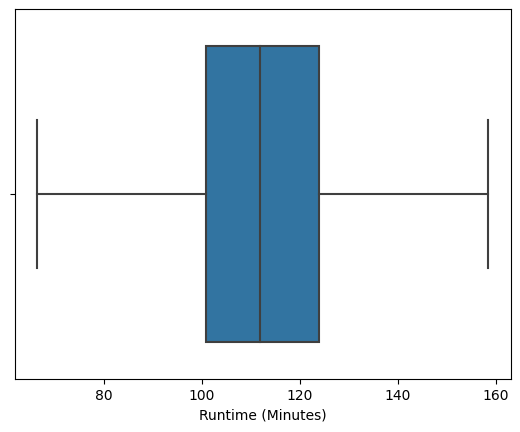

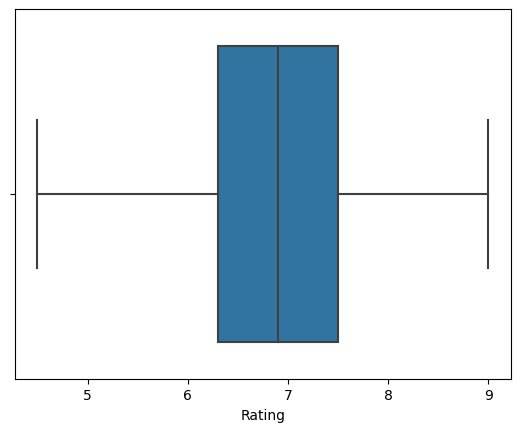

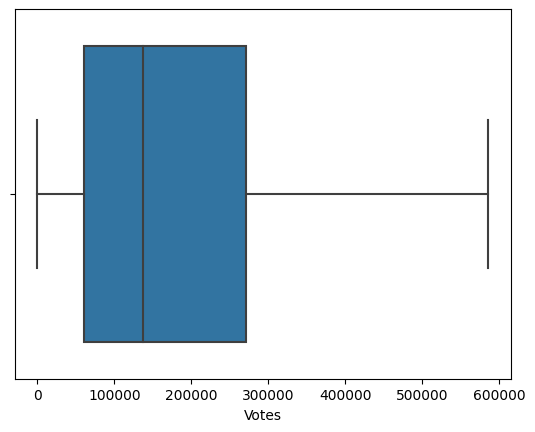

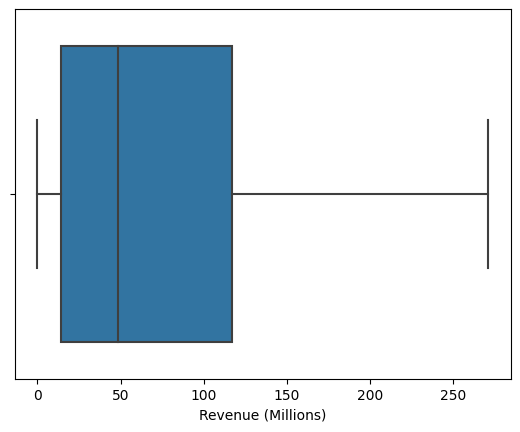

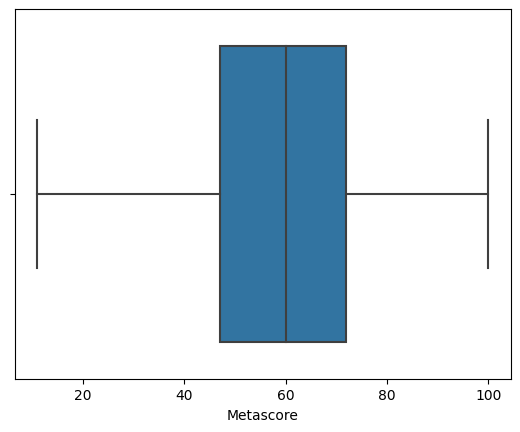

In [23]:
# Create the boxplot
for feature in numerical_data:
    sns.boxplot(x=feature, data = df_no_null)
    plt.show()

In [26]:
df_no_null.to_csv('imdb_data_cleaned.csv', index=False)

In [ ]:
df.columns

In [29]:
filt = df['Runtime (Minutes)'] >= 180

In [30]:
df[filt][ 'Title']

Series([], Name: Title, dtype: object)

In [31]:
df.loc[filt, 'Title']

Series([], Name: Title, dtype: object)

In [ ]:
df.columns

In [32]:
year_group = df.groupby(['Year'])['Votes'].mean().sort_values(ascending=False)

In [33]:
year_group.head(1)

Year
2007    264837.676136
Name: Votes, dtype: float64

In [ ]:
sns.barplot(x='Year', y='Votes', data=df)
plt.title("Votes per year")

In [ ]:
df.columns

In [ ]:
group_rev = df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False).head(1)

In [ ]:
group_rev

In [ ]:
sns.barplot(x='Year', y='Revenue (Millions)', data=df)
plt.title('Average revenue per year')

In [ ]:
plt.bar('Year', 'Revenue (Millions)', data=df)
plt.xlabel('Revenue')
plt.ylabel('Year')
plt.title('Average revenue per year')

In [ ]:
df.columns

In [ ]:
direct_group = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(1)

In [ ]:
direct_group

In [ ]:
df.columns

In [ ]:
df[['Title', 'Runtime (Minutes)']].sort_values(by='Runtime (Minutes)', ascending=False).set_index('Title').head(10)

In [ ]:
top10_lenthy_movies = df.nlargest(10, columns= 'Runtime (Minutes)')[['Title', 'Runtime (Minutes)']].set_index('Title')

In [ ]:
top10_lenthy_movies

In [ ]:
sns.barplot(x=top10_lenthy_movies['Runtime (Minutes)'], y=top10_lenthy_movies.index, data=top10_lenthy_movies)

In [ ]:
df.columns

In [ ]:
group_movies_by_year = df.groupby('Year')['Title'].count()

In [ ]:
group_movies_by_year

In [ ]:
df['Year'].value_counts()

In [ ]:
sns.displot(df['Year'],kde=True)

In [ ]:
sns.countplot(data=df, x='Year')
plt.title("Number of movies per Year")
plt.show()

In [ ]:
df.columns

In [ ]:
df.nlargest(1, 'Revenue (Millions)')['Title']

In [ ]:
highest_revenue = (df['Revenue (Millions)'].max() == df['Revenue (Millions)'])

In [ ]:
df[highest_revenue]['Title']

In [ ]:
df.columns

In [ ]:
top_10_movies = df.nlargest(10, 'Rating')[['Title', 'Rating', 'Director']].set_index('Title')

In [ ]:
top_10_movies

In [ ]:
sns.barplot(x='Rating', y=top_10_movies.index, data= top_10_movies, hue='Director', dodge= False)
plt.legend(bbox_to_anchor=(1, .6), loc=2)

In [ ]:
df.columns

In [ ]:
top10_highest_revenue = df.nlargest(10, 'Revenue (Millions)')[['Title', 'Revenue (Millions)']].set_index('Title')

In [ ]:
top10_highest_revenue

In [ ]:
sns.barplot(x='Revenue (Millions)', y=top10_highest_revenue.index, data=top10_highest_revenue)
plt.title('Top 10 Highest gross movies')
plt.show()

In [ ]:
df.columns

In [ ]:
group_by_year = df.groupby('Year')['Rating'].mean().sort_values(ascending=False)

In [ ]:
group_by_year

In [ ]:
df.columns

In [ ]:
sns.scatterplot(x='Rating', y='Revenue (Millions)', data=df, color='g')

In [ ]:
df.columns


In [ ]:
def rating(rating):
    if rating >= 7.5:
        return 'Excellent'

    elif rating >= 6.0:
        return 'Good'
    else:
        return 'average'
    

In [ ]:
df['Rating_cat'] = df["Rating"].apply(rating)

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df['Genre']

In [ ]:
filt = df['Genre'].str.contains('Action', case=False, na=False)

In [ ]:
len(df[filt])

In [ ]:
df.columns

In [ ]:
glist = []
for value in df['Genre']:
    glist.append(value.split(','))

In [ ]:
glist

In [ ]:
genre_list = []

for item in glist:
    for item1 in item:
        if item1 not in genre_list:
            genre_list.append(item1)

In [ ]:
genre_list

In [ ]:
len(genre_list)

In [ ]:
one_d = []

for item in glist:
    for item1 in item:
        one_d.append(item1)

In [ ]:
one_d

In [ ]:
from collections import Counter

In [ ]:
Counter(one_d)

In [ ]:
df.columns


In [ ]:
plt.scatter(df['Rating'], df['Revenue (Millions)'])
plt.xlabel('Rating of the movies')
plt.ylabel('Revenue of the movies')
plt.show()

In [ ]:
plt.scatter(df['Runtime (Minutes)'], df['Revenue (Millions)'])
plt.xlabel('Runtime of the movies')
plt.ylabel('Revenue of the movies')
plt.show()

In [ ]:
plt.scatter(df['Votes'], df['Rating'])
plt.xlabel('Votes for the movies')
plt.ylabel('Rating of the movies')
plt.show()

In [ ]:
df.columns

In [ ]:
lddf.dropna(inplace=True)

In [ ]:
df.isna().any().any()

In [ ]:
y = df['Revenue (Millions)'] 

In [ ]:
df['Director'] = pd.factorize(df['Director'])[0]

In [ ]:
df['Director']

In [ ]:
y.isna().any()

In [ ]:
X = df[['Director', 'Runtime (Minutes)', 'Rating', 'Votes', 'Metascore']]

In [ ]:
X.info()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_model = RandomForestRegressor(random_state = 0)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
print(mean_absolute_error(y_test, forest_pred))